In [19]:
%matplotlib inline

import gzip
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
file = 'raws/3ZK8_1_A.raw.gz'
file = 'tfrecord/sample_prot.raw.gz'

In [20]:
with gzip.open(file, 'rb') as f:
    header = []
    line = f.readline().decode().strip()
    len_ = 0
    while line[0] != '#':
        header += [np.fromstring(line, sep='\t')]
        line = f.readline().decode().strip()
        len_ += 1
    header = np.array(header)
    print(f'header shape: {header.shape}')
    
    indices = np.triu_indices(len_, 1)
    indices = list(zip(indices[0], indices[1]))
    raw_mat = np.empty((len_, len_, 21, 21))
    i = -1  # counter for the entry that we are on
    while line != '':
        if line[0] == '#':
            if i != -1:
                raw_mat[indices[i]] = tmp
            i += 1
            k = 0
            tmp = np.empty((21, 21))
        else:
            tmp[k] = np.fromstring(line, sep='\t')
            k += 1
        line = f.readline().decode().strip()
    print(f'raw shape: {raw_mat.shape}')
        

header shape: (106, 20)
raw shape: (106, 106, 21, 21)


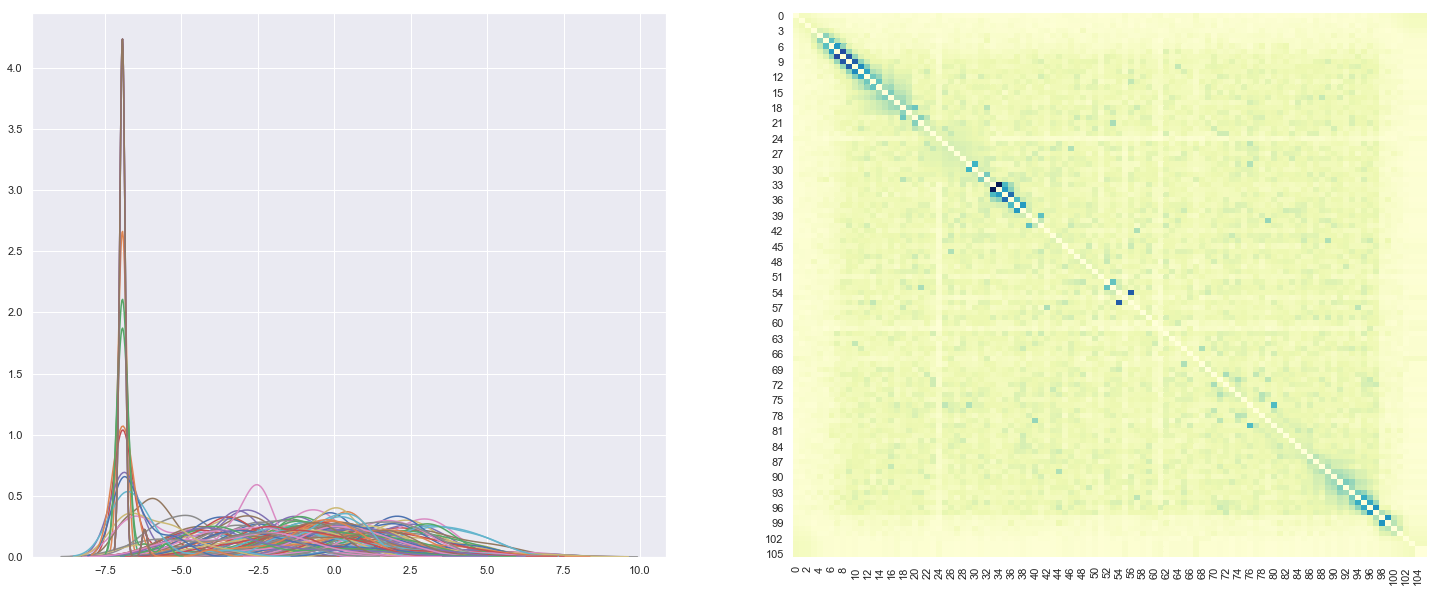

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
for row in header:
    sns.kdeplot(row, ax=ax[0])
    
reduced = np.max(np.max(raw_mat, axis=-1), axis=-1)
reduced = reduced + np.transpose(reduced)
sns.heatmap(reduced, cbar=False, cmap='YlGnBu', ax=ax[1])

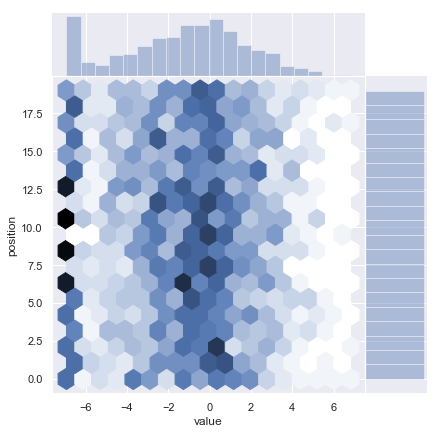

In [22]:
vals = np.reshape(np.swapaxes(header, 0, 1), (-1,))
idx = np.tile(np.arange(20), (header.shape[0]))
sns.jointplot(vals, idx, kind='hex', space=0, joint_kws={'gridsize': 17},
                  marginal_kws={'bins': 20}).\
    set_axis_labels('value', 'position')

Text(0.5, 1.0, 'APC corrected')

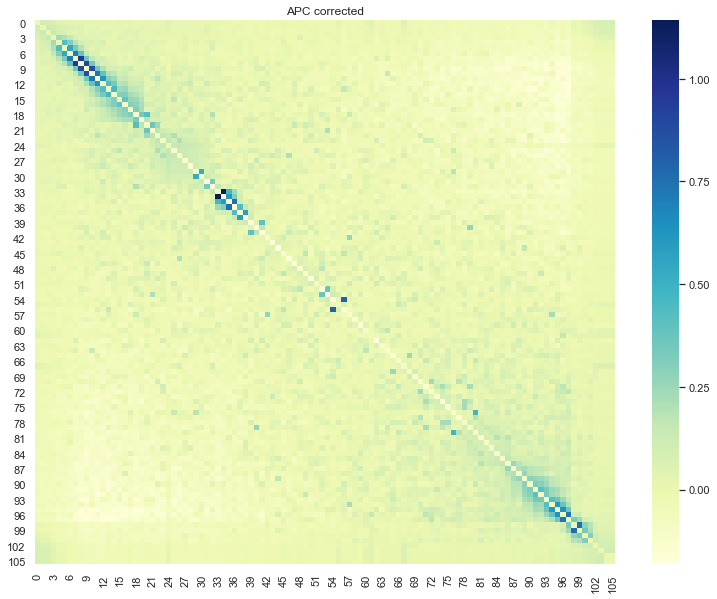

In [45]:
mat = np.max(np.max(raw_mat, axis=-1), axis=-1)
row_sum = np.sum(mat, axis=1)
col_sum = np.sum(mat, axis=0)
tot_sum = np.sum(np.sum(mat))
weights = np.outer(col_sum, row_sum)
mat_apc = mat - (weights / tot_sum)
mat_apc = mat_apc + mat_apc.T

plt.figure(figsize=(13, 10))
sns.heatmap(mat_apc, cmap='YlGnBu').set_title('APC corrected')